In [1]:
"""
This is a demonstration of data visualization for random matrices.
Author: Makoto Yamashita
Created: 2024-01-25
Last modified: 2024-01-29
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from ipywidgets import interact

%matplotlib widget

generate random symmetric matrices of size N, compute their eigenvalues

In [2]:
N = 30
SAMPLE_SIZE = 100
rand_mats = []
eigvals = []
for i in range(SAMPLE_SIZE):
    this_mat = np.empty([N,N])
    for j in range(N):
        this_mat[j,j] = 2 * np.random.rand() - 1
        for k in range(0,j):
            this_mat[j,k] = this_mat[k,j]
        for k in range(j+1,N):
            this_mat[j,k] = 2 * np.random.rand() - 1
    rand_mats.append(this_mat)
    eigvals.append(np.linalg.eigvals(this_mat))

represent matrices as grayscale images, animate them

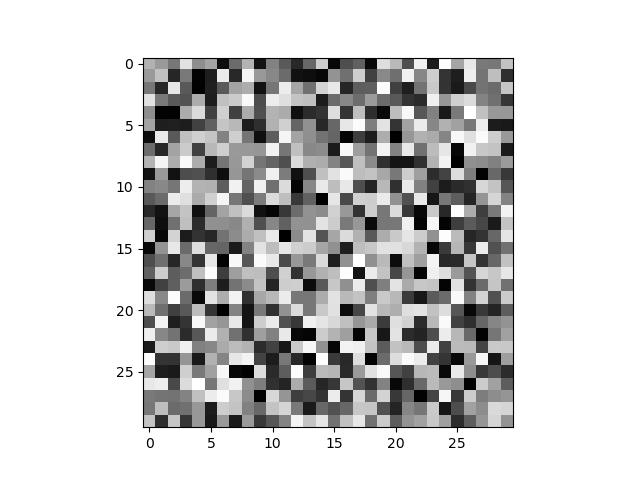

In [3]:
fig1, ax1 = plt.subplots()
im = plt.imshow(rand_mats[0], cmap='gray', vmin=-1.0, vmax=1.0)

def updatefig(frame_number):
    """Update the image with new data."""
    im.set_data(rand_mats[frame_number])

anm.FuncAnimation(fig1, updatefig, SAMPLE_SIZE, repeat=True, blit=False)

histogram plot of eigenvalues, interactive control to choose sample

In [4]:
HIST_BINS = np.linspace(-8, 8, 16)
fig2, ax2 = plt.subplots()

def show_hist(mat_ind):
    """Draw histogram of the eigenvalues for the mat_ind-th matrix."""
    plt.figure(fig2)
    plt.clf()
    plt.hist(eigvals[mat_ind], bins=HIST_BINS)
    plt.ylim((0,6))
    plt.show()

interact(show_hist, mat_ind=(0,SAMPLE_SIZE-1))

interactive(children=(IntSlider(value=49, description='mat_ind', max=99), Output()), _dom_classes=('widget-int…

<function __main__.show_hist(mat_ind)>

increase matrix and sample sizes

In [5]:
N2 = 100
SAMPLE_SIZE2 = 100

In [6]:
rand_mats2 = []
eigvals2 = []
for i in range(SAMPLE_SIZE2):
    this_mat = np.empty([N2,N2])
    for j in range(N2):
        this_mat[j,j] = np.random.rand()
        for k in range(0,j):
            this_mat[j,k] = this_mat[k,j]
        for k in range(j+1,N2):
            this_mat[j,k] = np.random.rand()
    rand_mats2.append(this_mat)
    eigvals2.append(np.linalg.eigvals(this_mat))

get histogram of eigenvalues for each matrix, animate it

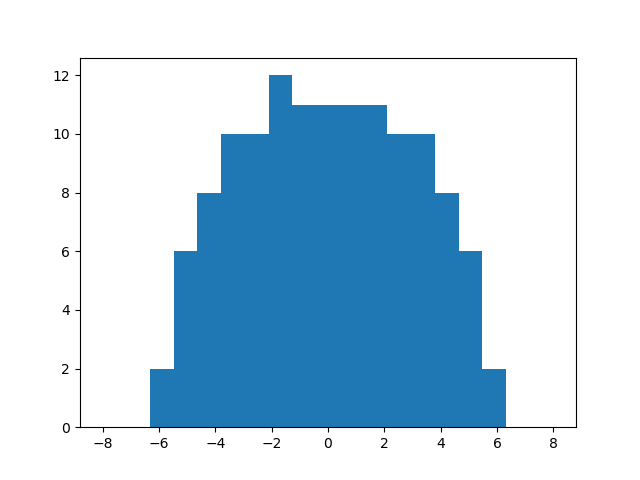

In [7]:
HIST_BINS2 = np.linspace(-8, 8, 20)
fig3, ax3 = plt.subplots()
# return value of hist function is a triple whose last entry is a
# container of Artist objects
bc_list = [ax3.hist(mat_evs, bins=HIST_BINS2, color='C0')[2] for mat_evs in eigvals2]

anm.ArtistAnimation(fig3, bc_list)

histogram of collated eigenvalues

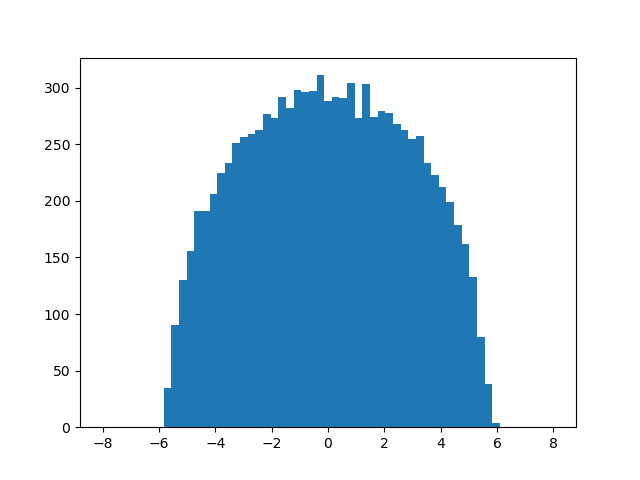

In [8]:
HIST_BINS3 = np.linspace(-8, 8, 60)
coll_eigs2 = np.concatenate(eigvals2)
fig4, ax4 = plt.subplots()

# dummy assignment to supress printing of the return value
# (this is only needed at the end of a cell)
_ = ax4.hist(coll_eigs2, HIST_BINS3)

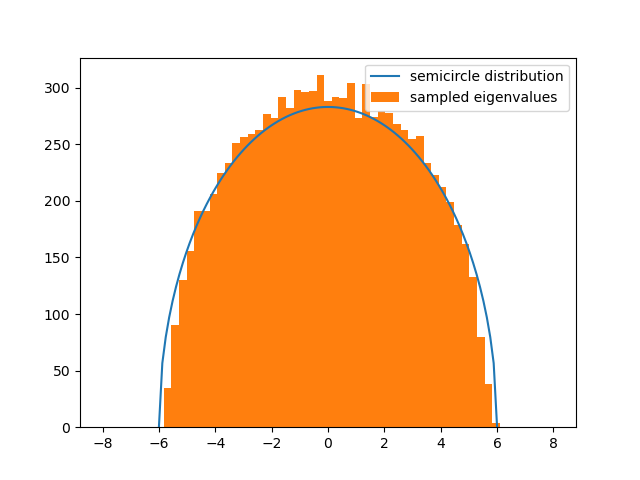

In [9]:
fig42, ax42 = plt.subplots()
xvar = np.linspace(-6, 6, 100)
# semicircle distribution with radius R = 6, normazized by
# SAMPLE_SIZE2 * N2 (number of eigenvalues) and
# 16 / 60 (area of each sample from HIST_BINS3)
ax42.plot(xvar, np.sqrt(36 - xvar**2)*(2*SAMPLE_SIZE2*N2*16)/(np.pi * 36 * 60))
ax42.hist(coll_eigs2, HIST_BINS3)
ax42.legend(["semicircle distribution", "sampled eigenvalues"])

compute trace of quadratic polynomials in random matrices

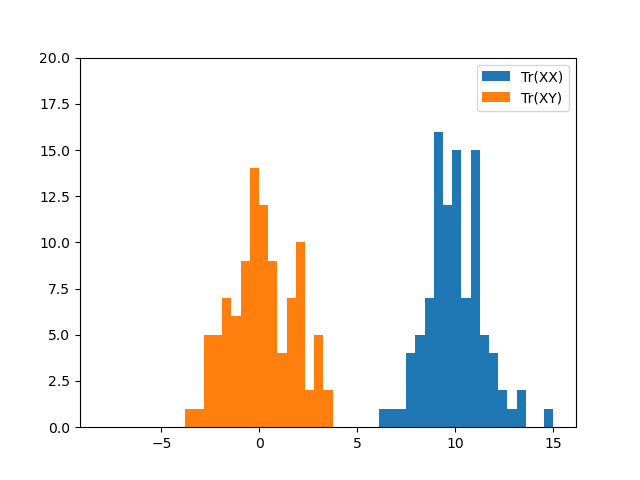

In [10]:
HIST_BINS3 = np.linspace(-8, 15, 50)
# sample Tr(XX) by moving X by moving X in rand_mats
# drop the first term to be consistent with Tr(XY)
tr_list1 = [np.trace(x * x) for x in rand_mats][1:]
# sample Tr(XY) by fixing Y = rand_mats[0] and moving X in rand_mats
# drop the self-product of the first matrix
tr_list2 = [np.trace(x * rand_mats[0]) for x in rand_mats][1:]
fig5, ax5 = plt.subplots()

ax5.hist(tr_list1, bins=HIST_BINS3, histtype='barstacked')
ax5.hist(tr_list2, bins=HIST_BINS3, histtype='barstacked')
ax5.set_ylim((0,20))
ax5.legend(["Tr(XX)", "Tr(XY)"])